In [1]:
# bank marketing data set from UCI: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Data import and exploration

bank_data = pd.read_excel(r"C:\Users\rsele\OneDrive\Data Science/bank.xlsx")
pd.set_option('display.expand_frame_repr', False)


bank_data.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#select all numeric variables
numeric_columns = bank_data.select_dtypes(exclude="object")
numeric_columns.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [8]:
#select all categorical variables
cat_columns = bank_data.select_dtypes(include="object")
cat_columns.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


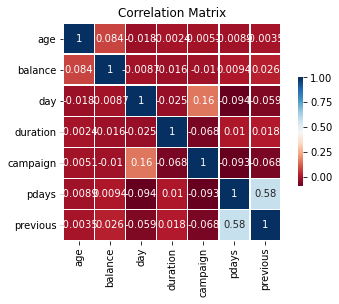

In [9]:
# rename column y
bank_data["term_deposit"]=bank_data["y"]
bank_data.drop("y", axis="columns", inplace=True)

# show correlation of the numeric variables
numeric = numeric_columns.corr()
sns.heatmap(numeric, cbar=True,cmap = "RdBu",annot=True,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix")
plt.show()

In [10]:
# dropping "pdays" because it correlates with "previous"
numeric_columns.drop("pdays",axis=1)
print(numeric_columns)

      age  balance  day  duration  campaign  pdays  previous
0      30     1787   19        79         1     -1         0
1      33     4789   11       220         1    339         4
2      35     1350   16       185         1    330         1
3      30     1476    3       199         4     -1         0
4      59        0    5       226         1     -1         0
...   ...      ...  ...       ...       ...    ...       ...
4516   33     -333   30       329         5     -1         0
4517   57    -3313    9       153         1     -1         0
4518   57      295   19       151        11     -1         0
4519   28     1137    6       129         4    211         3
4520   44     1136    3       345         2    249         7

[4521 rows x 7 columns]


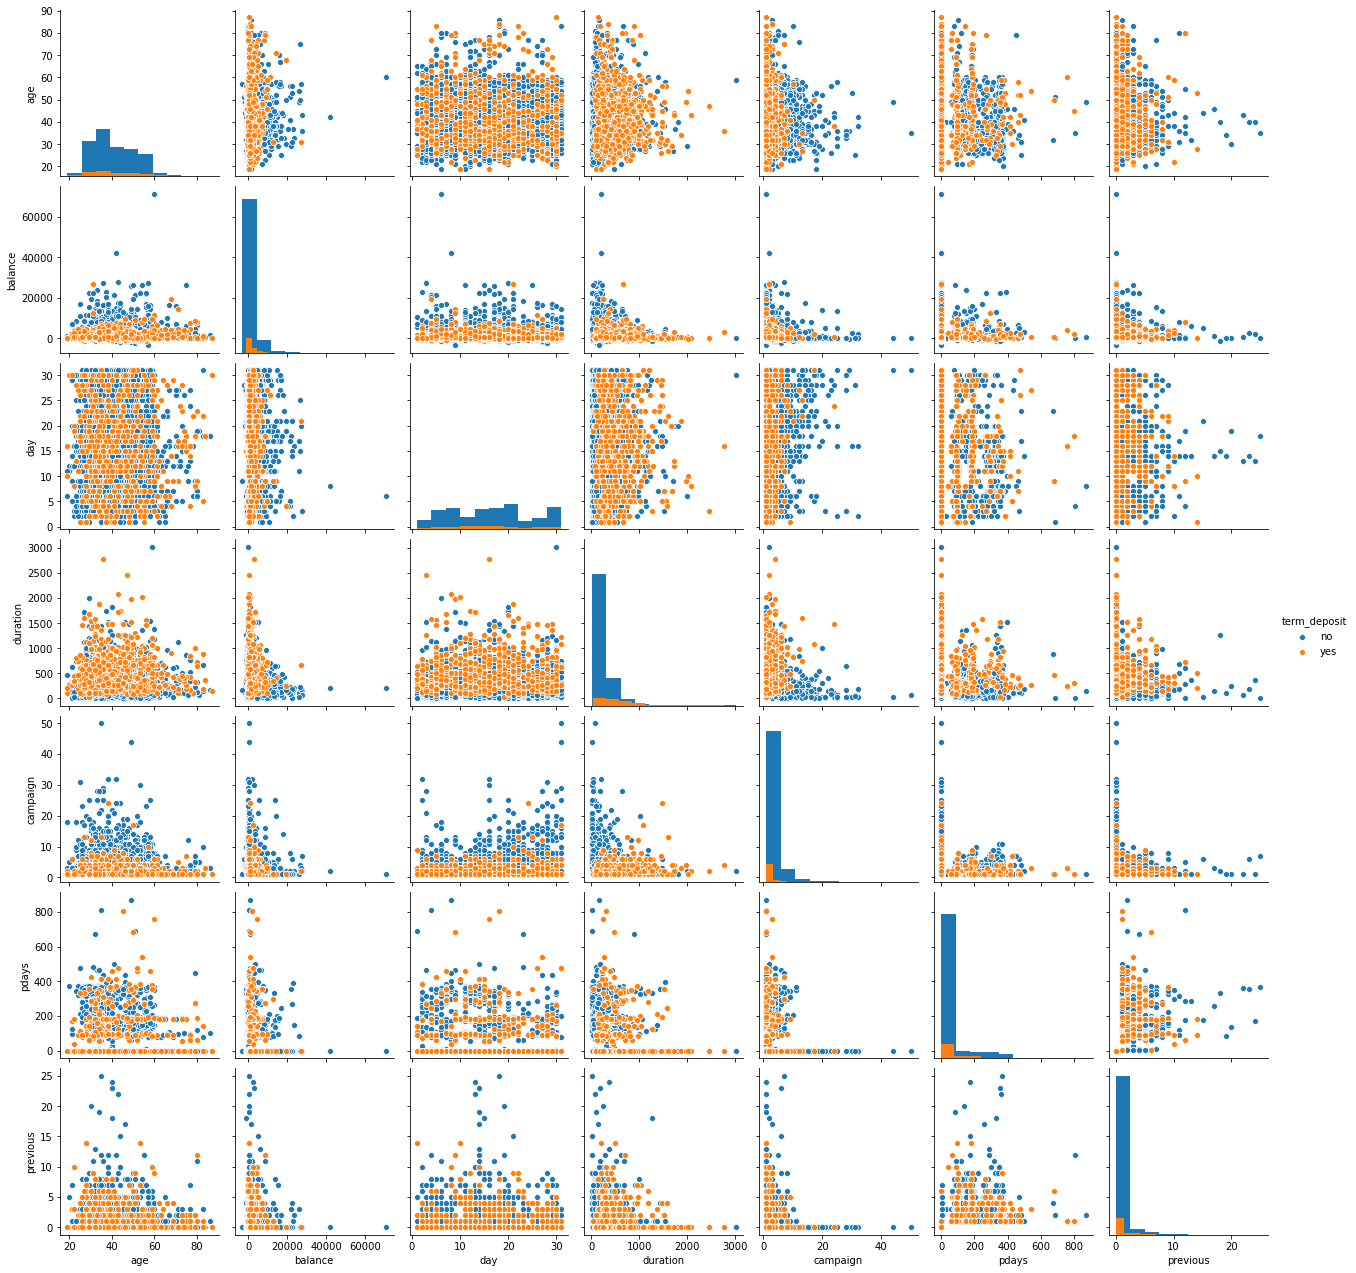

In [11]:
#show overall relationship between the variables
sns.pairplot(bank_data, hue="term_deposit",diag_kind="hist")
plt.show()

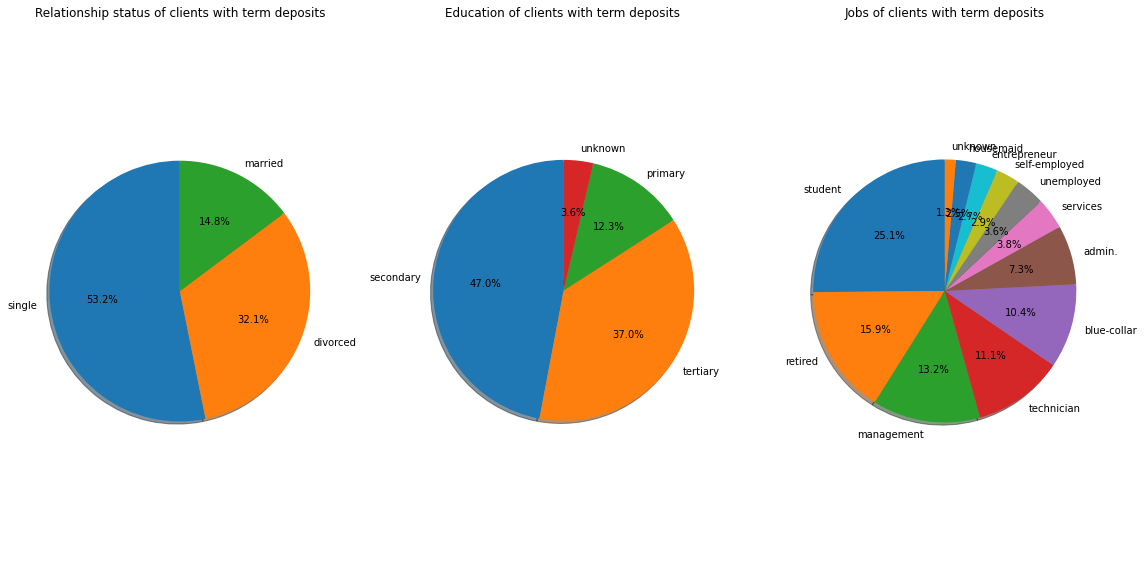

In [12]:
# some graphics to understand the clients who actually subscribed for a term deposit:


labels = bank_data.marital[bank_data.term_deposit=="yes"].unique()
sizes = bank_data.marital[bank_data.term_deposit=="yes"].value_counts()

labels1 = bank_data.education[bank_data.term_deposit=="yes"].unique()
sizes1 = bank_data.education[bank_data.term_deposit=="yes"].value_counts()

labels2 = bank_data.housing[bank_data.term_deposit=="yes"].unique()
sizes2 = bank_data.housing[bank_data.term_deposit=="yes"].value_counts()


labels3 = bank_data.job[bank_data.term_deposit=="yes"].unique()
sizes3 = bank_data.job[bank_data.term_deposit=="yes"].value_counts()


fig, ax = plt.subplots(1,3,sharey=False,figsize=(16,8))
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title("Relationship status of clients with term deposits")

ax[1].pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax[1].set_title("Education of clients with term deposits")

ax[2].pie(sizes3, labels=labels3, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax[2].set_title("Jobs of clients with term deposits")

plt.tight_layout()
plt.show()

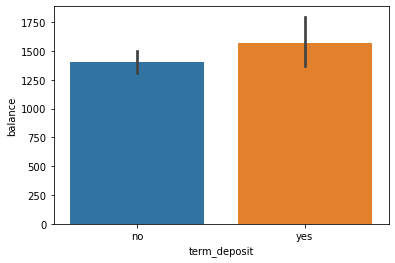

In [13]:
sns.barplot(x="term_deposit",y="balance",data=bank_data)

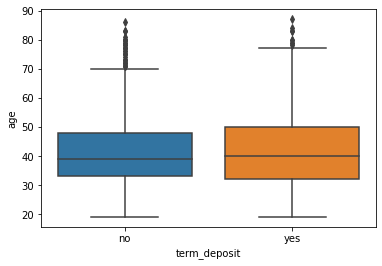

In [14]:
sns.boxplot(x="term_deposit",y="age",data=bank_data)

In [15]:
# scaling and encoding the features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [16]:
ohe = OneHotEncoder(sparse=False)
encoded_c = ohe.fit_transform(cat_columns)

scaler = StandardScaler()
scaled_c = scaler.fit_transform(numeric_columns)

In [17]:
transformed_data = np.concatenate([scaled_c,encoded_c],axis=1)

In [18]:
transformed_data.shape

(4521, 53)

In [19]:
# determine the indepentend X variables
X = transformed_data[:,0:51]
X.shape

(4521, 51)

In [20]:
# determine the dependent variable y
y = transformed_data[:,52]
y.shape

(4521,)

In [21]:
from sklearn.model_selection import GridSearchCV,KFold,cross_validate,train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report


In [22]:
# determine the SEED for reproduceability and kfold for the crossvalidation
SEED = 42
kfold = KFold(n_splits=5, shuffle = True, random_state=SEED)

In [23]:
#Split the data in test and training set
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.1,stratify=y,random_state=SEED)

In [24]:
#import different classifier from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb





In [25]:
lr = LogisticRegression(random_state=SEED,max_iter = 4000)
knn = KNN()
svm = SVC(random_state=SEED)

dt = DecisionTreeClassifier(random_state=SEED)
rf=RandomForestClassifier(random_state=SEED)

xgb_cl = xgb.XGBClassifier(random_state=SEED)

In [26]:
classifier = [("Logistic Regression",lr),
              ("KNN",knn),
              ("SVC",svm),
              ("Desicion Tree",dt),
              ("Random Forest",rf),
              ("XGBClassifier",xgb_cl)]

In [27]:
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [28]:
#run different models with cross-validation and measure their performance 
#performance measure with recall-score to reduce the type 2 error (predict "no" but actually "yes")
#oversampling with smote because their is way more data with "no"-label then with "yes"-label
cv_scores = []
cv_fit_time = []
df_clf = []
smote = SMOTE(random_state=SEED)
for clf_name,clf in classifier:
    imba_pipeline= make_pipeline(smote,clf)
    score = cross_validate(imba_pipeline,X_train,y_train,cv=5,scoring="recall")
    cv_scores.append(score["test_score"].mean()*100)
    cv_fit_time.append(score["fit_time"].mean())
    df_clf.append(clf_name)
  

df_scores = pd.DataFrame(cv_scores,columns=["Test Scores"])
df_fit = pd.DataFrame(cv_fit_time,columns=["Fit Time"])
df_clf = pd.DataFrame(df_clf,columns=["Classifier"])
df_clf_scores= pd.concat([df_clf, df_scores,df_fit], axis=1)
df_clf_scores = df_clf_scores.sort_values(by=["Test Scores"], ascending=False)
print(df_clf_scores)

            Classifier  Test Scores  Fit Time
0  Logistic Regression    76.959506  0.067419
2                  SVC    69.075726  0.785478
1                  KNN    68.444292  0.073501
3        Desicion Tree    51.358957  0.064440
5        XGBClassifier    45.412949  0.317873
4        Random Forest    39.011668  0.548088


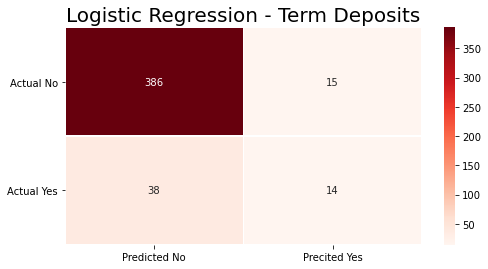

AUC Logistic Regression: : 0.87


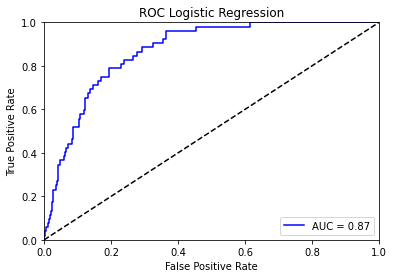

Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       401
         1.0       0.48      0.27      0.35        52

    accuracy                           0.88       453
   macro avg       0.70      0.62      0.64       453
weighted avg       0.86      0.88      0.87       453



In [29]:
#performance of chosen model (logistic regression)
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap=plt.cm.Reds)
plt.title("Logistic Regression - Term Deposits", fontsize=20)
ax.set_xticklabels(["Predicted No", "Precited Yes"])
ax.set_yticklabels(['Actual No', 'Actual Yes'], rotation=360)
plt.show()

# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("{:s}: {:.2f}".format("AUC Logistic Regression: ",roc_auc))


      
plt.title('ROC Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Logistic Regression: \n",classification_report(y_test,y_pred))

In [30]:
# select parameters for hyperparametertuning
params = {'C': [0.01,0.1,10,100], #so called `eta` value
          'solver': ["newton-cg","lbfgs","sag","saga"]}
imba_pipeline=make_pipeline(smote,lr)
new_params = {'logisticregression__' + key: params[key] for key in params}
cv_clf = GridSearchCV(imba_pipeline,new_params, cv=kfold,scoring="recall")
lr_opt=cv_clf.fit(X_train,y_train)
print(lr_opt.best_estimator_)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=4000, random_state=42,
                                    solver='newton-cg'))])


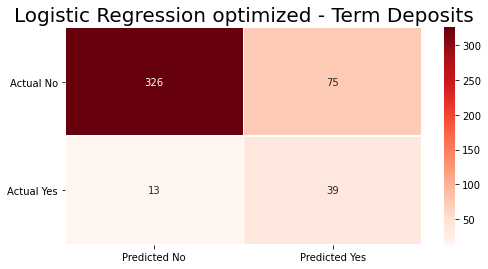

AUC Logistic Regression optimized: : 0.86


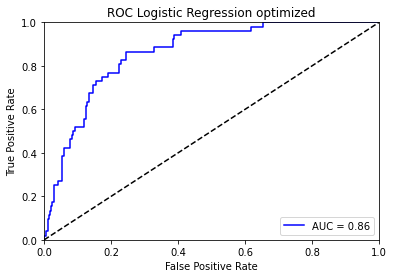

Logistic Regression optimized: 
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       401
         1.0       0.34      0.75      0.47        52

    accuracy                           0.81       453
   macro avg       0.65      0.78      0.68       453
weighted avg       0.89      0.81      0.83       453



In [31]:
#performance of tuned model
# more people who are actual "yes" were identified 
# Tradeoff: more people who are actual "no" were classified as "yes" too.
# in context of a marketing campaign we assume, that it is better to have more false positives than false negatives
y_pred = lr_opt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap=plt.cm.Reds)
plt.title("Logistic Regression optimized - Term Deposits", fontsize=20)
ax.set_xticklabels(["Predicted No", "Predicted Yes"])
ax.set_yticklabels(['Actual No', 'Actual Yes'], rotation=360)
plt.show()

# calculate the fpr and tpr for all thresholds of the classification
probs = lr_opt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("{:s}: {:.2f}".format("AUC Logistic Regression optimized: ",roc_auc))


      
plt.title('ROC Logistic Regression optimized')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Logistic Regression optimized: \n",classification_report(y_test,y_pred))

# it would be better to collect more data, because the models performance is poor on the "yes"-labeled data